# Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load the data

In [2]:
#Load Dataset
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


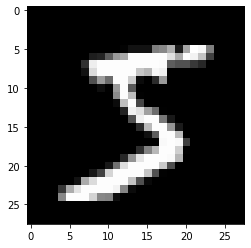

In [3]:
# Visualize a samoke image
plt.imshow(x_train[0], cmap = 'gray')

In [4]:
# Shape and Size of data
print("x_train shape:- " + str(x_train.shape))
print("x_test shape:- " + str(x_test.shape))
print("y_train shape:- " + str(y_train.shape))
print("y_test shape:- " + str(y_test.shape))

x_train shape:- (60000, 28, 28)
x_test shape:- (10000, 28, 28)
y_train shape:- (60000,)
y_test shape:- (10000,)


# Data Visualization



0.   T-shirt
1.   Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot





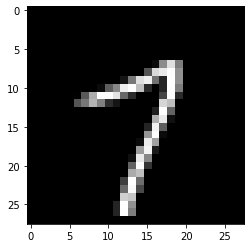

In [5]:
# View some images
i = random.randint(1,60000)
plt.imshow(x_train[i], cmap = 'gray')

In [6]:
label = y_train[i]
label

7

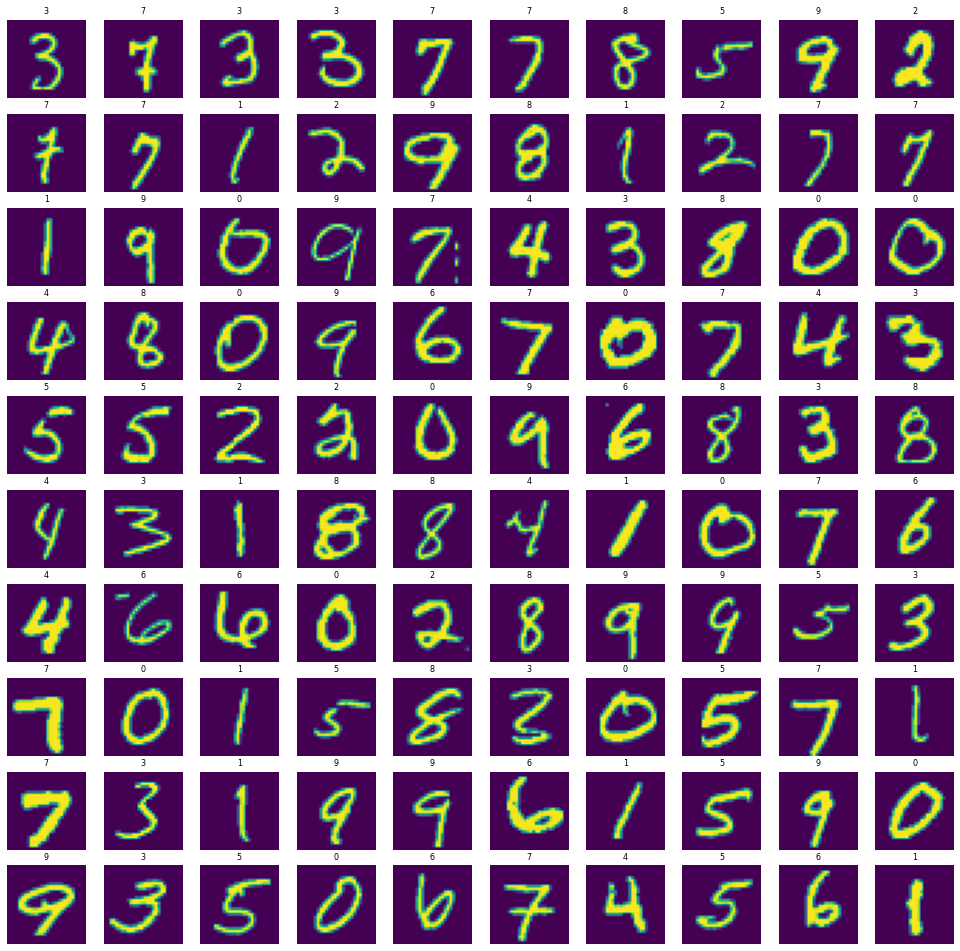

In [7]:
# Grid view of data 15 X 15
w_grid = 10
l_grid = 10

fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, w_grid*l_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')

# Data Preprocessing 

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
noise_factor = 0.7
noise_dataset = []

for img in x_train:
  noisy_img = img + noise_factor*np.random.randn(*img.shape)
  noisy_img = np.clip(noisy_img, 0, 1)
  noise_dataset.append(noisy_img)

noise_dataset = np.array(noise_dataset)

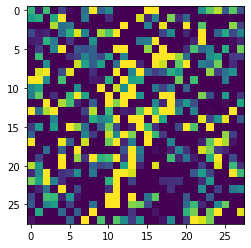

In [27]:
#noisy image of coat
plt.imshow(noise_dataset[22])

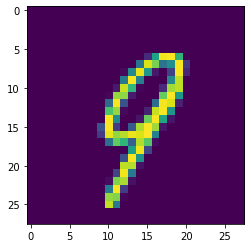

In [28]:
# orignal image of coat
plt.imshow(x_train[22])

In [0]:
noise_factor = 0.7
noise_dataset_test = []

for img in x_test:
  noisy_img = img + noise_factor*np.random.randn(*img.shape)
  noisy_img = np.clip(noisy_img, 0, 1)
  noise_dataset_test.append(noisy_img)

noise_dataset_test = np.array(noise_dataset_test)

# Auto Encoders

In [0]:
dropout_rate = 0.5
autoencoder = tf.keras.models.Sequential()
 #Encoder 
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 64, 
    kernel_size = 5,
    activation = 'relu',
    strides = 2,
    padding = 'same',
    input_shape = (28,28,1)))
'''
autoencoder.add(
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=3, padding="same")
)
'''
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 16, 
    kernel_size = 3, 
    activation = 'relu',
    strides = 2, 
    padding = 'same'))
'''
autoencoder.add(
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same")
)
'''
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 8, 
    kernel_size = 2, 
    activation = 'relu',
    strides = 1, 
    padding = 'same'))
'''
autoencoder.add(
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same")
)
'''
# Decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(
    filters = 8, 
    kernel_size = 2, 
    activation = 'relu',
    strides = 1, 
    padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2DTranspose(
    filters = 16, 
    kernel_size = 3, 
    activation = 'relu',
    strides = 2, 
    padding = 'same'))


autoencoder.add(tf.keras.layers.Conv2DTranspose(
    filters = 1, 
    kernel_size = 3, 
    strides = 2, 
    activation = 'relu', 
    padding = 'same'))

In [31]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 16)          9232      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           520       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 7, 7, 8)           264       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 12,993
Trainable params: 12,993
Non-trainable params: 0
__________________________________________________

In [38]:
autoencoder.fit(
    noise_dataset.reshape(-1,28,28,1),
    x_train.reshape(-1,28,28,1),
    epochs = 15,
    batch_size = 60,
    validation_data = (noise_dataset_test.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1))
)

Epoch 1/15
1000/1000 [==============================] - 32s 32ms/step - loss: 0.1770 - val_loss: 0.1815
Epoch 2/15
1000/1000 [==============================] - 33s 33ms/step - loss: 0.1736 - val_loss: 0.1703
Epoch 3/15
1000/1000 [==============================] - 33s 33ms/step - loss: 0.1723 - val_loss: 0.1696
Epoch 4/15
1000/1000 [==============================] - 32s 32ms/step - loss: 0.1712 - val_loss: 0.1688
Epoch 5/15
1000/1000 [==============================] - 32s 32ms/step - loss: 0.1706 - val_loss: 0.1683
Epoch 6/15
1000/1000 [==============================] - 33s 33ms/step - loss: 0.1691 - val_loss: 0.1674
Epoch 7/15
1000/1000 [==============================] - 32s 32ms/step - loss: 0.1728 - val_loss: 0.1699
Epoch 8/15
1000/1000 [==============================] - 35s 35ms/step - loss: 0.1703 - val_loss: 0.1668
Epoch 9/15
1000/1000 [==============================] - 34s 34ms/step - loss: 0.1678 - val_loss: 0.1777
Epoch 10/15
1000/1000 [==============================] - 37s 37m

In [39]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1))
print('test accuracy:- {:.4f}'.format(evaluation))

313/313 [==============================] - 2s 7ms/step - loss: 0.1628
test accuracy:- 0.1628


In [0]:
predicted = autoencoder.predict(noise_dataset_test[:10].reshape(-1,28,28,1))

# 50% in traing and testing Noise

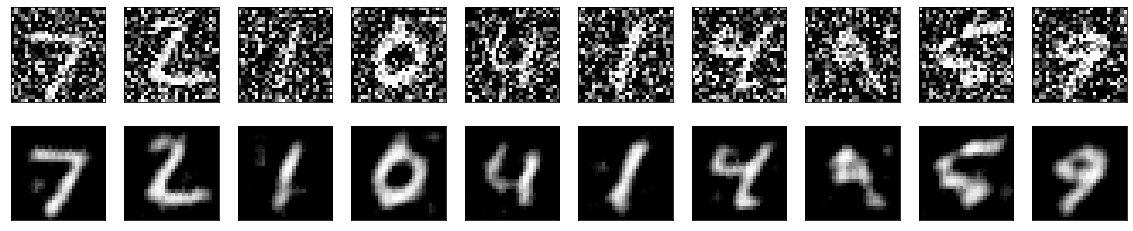

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# 10% in testing and 50% noise in training

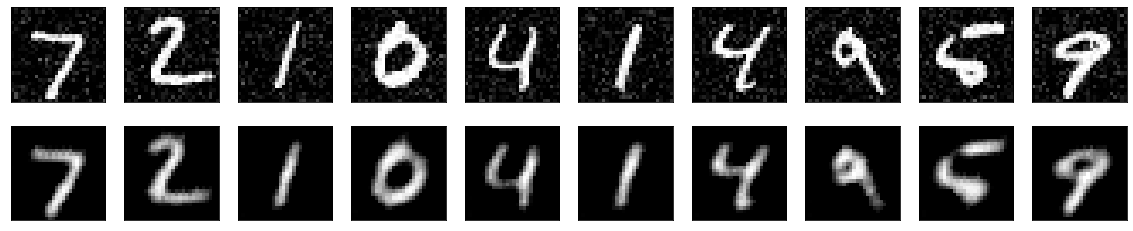

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# 70% noise in training and 50% in test

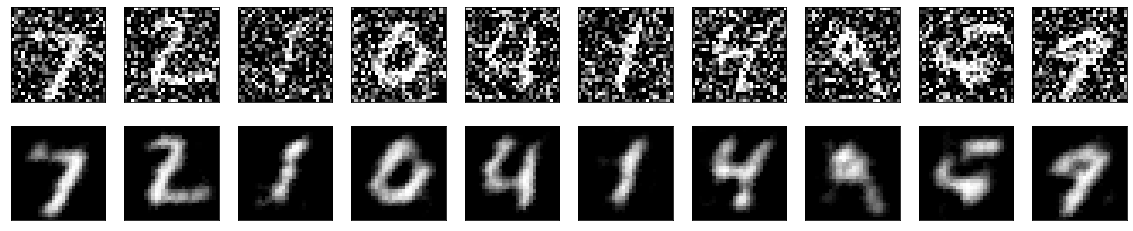

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# 70% noise in training and 70% in test

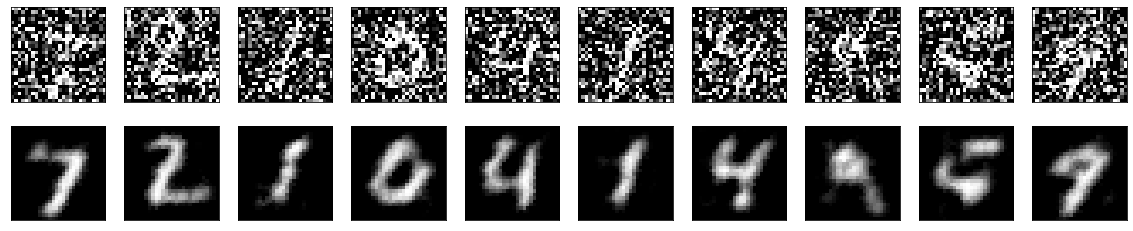

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)